# Data Analysis

## 1. Objectives

This notebook has two objectives. Both relate to the first Project Requirement as outlined in the README document.

1. Determine which features (labels) contribute most to house prices in Ames, Iowa.
2. Generate data using labels identified in step 1 to be used for the second Project Requirement outlined in the README.

## 2. Import Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stemgraphic as stm

## 3. Load Data

This data set is supplied as two csv files: one for training and one for testing. The train.csv file will be used for Exploratory Data Analysis (EDA) and will be loaded first.

In [2]:
import os

# Get the current working directory (cwd)
cwd = os.getcwd()
print(f"[*] Previous working directory: {cwd}")

# Make the parent of the cwd the new cwd
os.chdir(os.path.dirname(cwd))
cwd = os.getcwd()
print(f"[*] Updated current working directory: {cwd}")

# Load the data
df_train = pd.read_csv("inputs/datasets/raw/train.csv")
df_test = pd.read_csv("inputs/datasets/raw/test.csv")


[*] Previous working directory: /workspace/house-price-regression/jupyter_notebooks
[*] Updated current working directory: /workspace/house-price-regression


### 3.1 View the training data set

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
df_train.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


### 3.2 View the test data set

In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 4 Data Discovery

- Information column names, not null counts and data types for columns
- Check for missing values

### 4.1 Data set information

#### 4.1.1 Training data set info

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### 4.1.2 Test data set info

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### 4.2 Missing Values

Find the total number of missing values and their percentages

#### 4.2.1 Training data set missing values

In [7]:
# Check missing values in training data set
df_train_missing_total = df_train.isnull().sum().sort_values(ascending=False)
df_train_missing_percentage = ((df_train.isnull().sum()/df_train.isnull().count()) * 100).sort_values(ascending=False)
df_training_missing_table = pd.concat([df_train_missing_total,
                                      df_train_missing_percentage],
                                      axis=1,
                                      keys=['Total missing values', 'Percentage'])
df_training_missing_table.head(20)

,Total missing values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


#### 4.2.2 Test data set missing values

In [9]:
# Check missing values in test data set
df_test_missing_total = df_test.isnull().sum().sort_values(ascending=False)
df_test_missing_percentage = ((df_test.isnull().sum()/df_test.isnull().count()) * 100).sort_values(ascending=False)
df_test_missing_table = pd.concat([df_test_missing_total,
                                  df_test_missing_percentage],
                                  axis=1,
                                  keys=['Total missing values', 'Percentage'])
df_test_missing_table.head(20)

,Total missing values,Percentage
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127
GarageCond,78,5.346127


## 5 Exploratory Data Analysis

This section will enable a "feel" for the data and which labels might affect the Sales Price of properties.

In [22]:
# Set Seaborn as the theme for plotting
sns.set_theme()

### 5.1 Exploring the target variable (SalePrice)

Since we're interested in predicting the sale price of properties, we'll explore this feature first and see what insight we can gain from it.

#### 5.1.1 SalePrice Description

In [18]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### 5.1.2 SalePrice Histogram

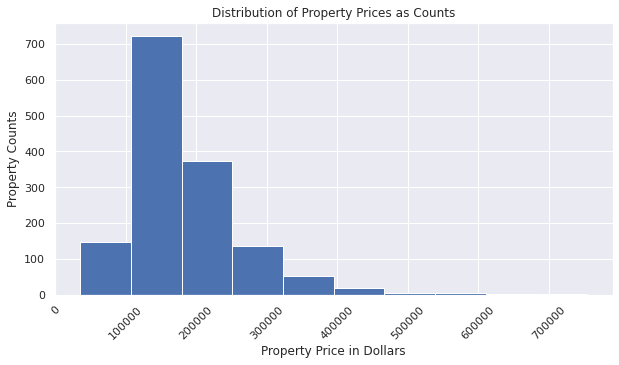

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(df_train['SalePrice'])
plt.title("Distribution of Property Prices as Counts")
plt.xlabel("Property Price in Dollars")
plt.ylabel("Property Counts")
plt.xticks(rotation=45);

#### 5.1.3 Box plot of SalePrice showing the mean, quartiles and outliers

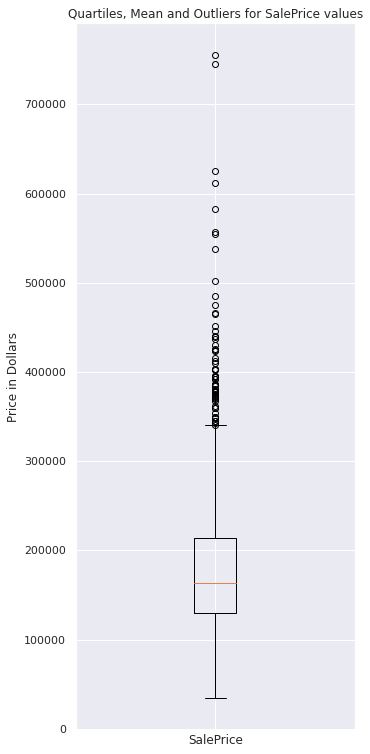

In [40]:
fig, ax = plt.subplots(figsize=(5, 13))
ax.boxplot(df_train['SalePrice'])
plt.title("Quartiles, Mean and Outliers for SalePrice values")
plt.xlabel("SalePrice")
plt.ylabel("Price in Dollars")
plt.tick_params(
    axis='x',          
    which='both',
    bottom=False,
    top=False,
    labelbottom=False);

#### 5.1.4 Stem and Leaf graphic of SalePrice showing most common price ranges

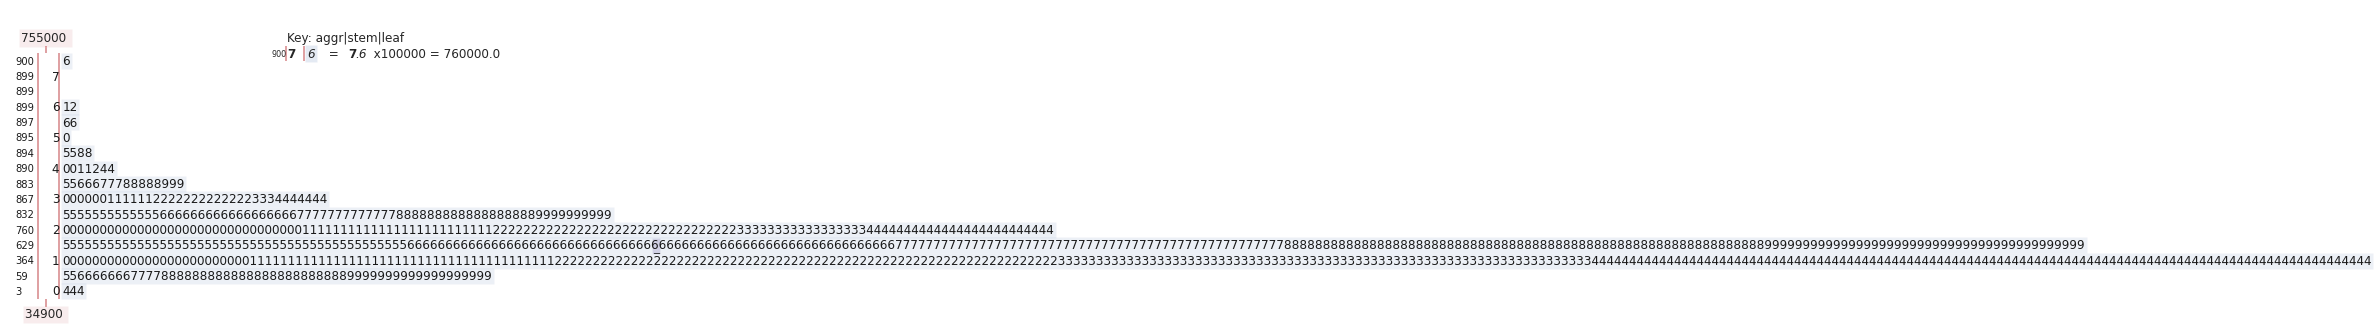

In [42]:
fig, ax = stm.stem_graphic(df_train['SalePrice'])

### 5.2 Exploring the correlation between SalePRice and other feature variables

#### 5.2.1 SalePrice vs YearBuilt

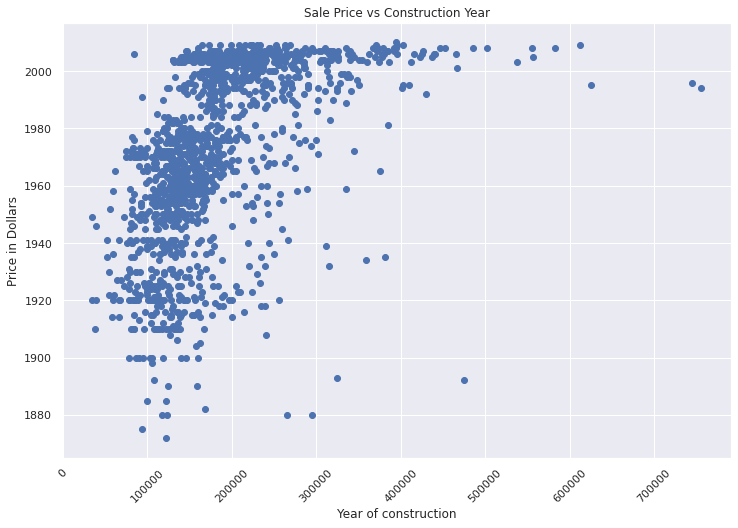

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df_train['SalePrice'], df_train['YearBuilt'])
plt.xticks(rotation=45)
plt.title("Sale Price vs Construction Year")
plt.xlabel("Year of construction")
plt.ylabel("Price in Dollars");

### 5.2.2 SalePrice vs GarageCars

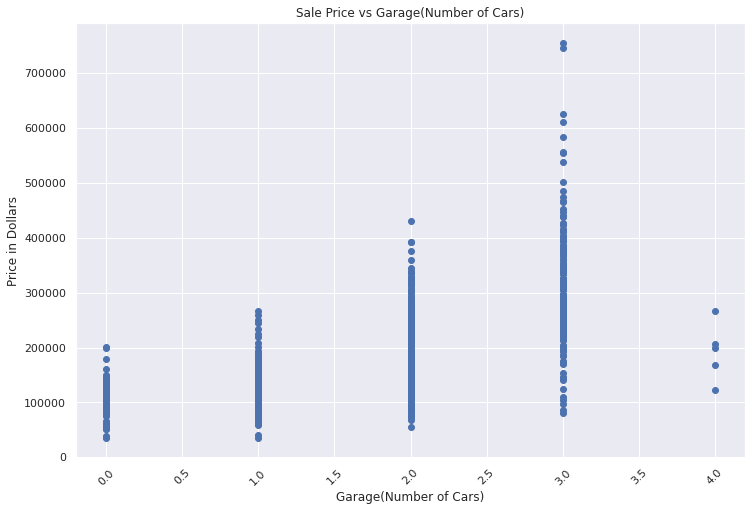

In [48]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df_train['GarageCars'], df_train['SalePrice'])
plt.xticks(rotation=45)
plt.title("Sale Price vs Garage(Number of Cars)")
plt.xlabel("Garage(Number of Cars)")
plt.ylabel("Price in Dollars");

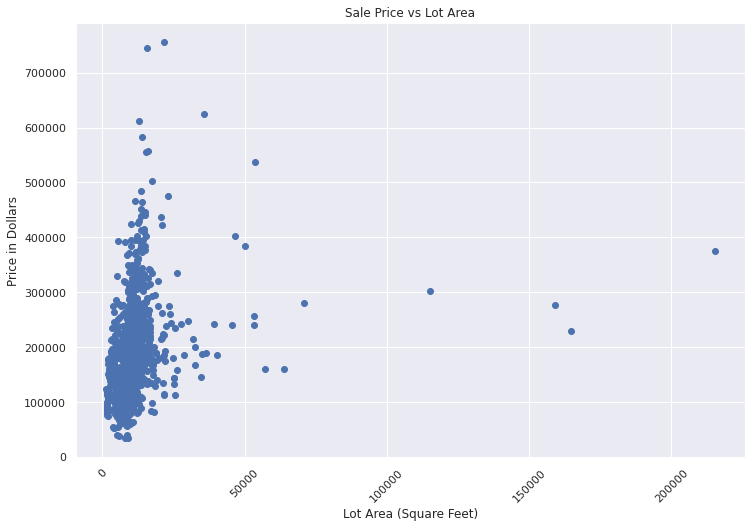

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df_train['LotArea'], df_train['SalePrice'])
plt.xticks(rotation=45)
plt.title("Sale Price vs Lot Area")
plt.xlabel("Lot Area (Square Feet)")
plt.ylabel("Price in Dollars");